In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
catalogue=pd.read_csv("C:/Users/hp/Documents/Cour_M1/Warehouse&BI/projet_data_mining/Catalogue.csv",encoding="latin1")
client=pd.read_csv("C:/Users/hp/Documents/Cour_M1/Warehouse&BI/projet_data_mining/Clients.csv",encoding="latin1")
immatriculations=pd.read_csv("C:/Users/hp/Documents/Cour_M1/Warehouse&BI/projet_data_mining/Immatriculations_small.csv",encoding="latin1")
marketing=pd.read_csv("C:/Users/hp/Documents/Cour_M1/Warehouse&BI/projet_data_mining/Marketing.csv",encoding="latin1")

# Statistiques globales
def afficher_stats(df, nom_df):
    print("="*60)
    print(f"📊 Statistiques descriptives : {nom_df}")
    print("="*60)
    print(df.describe(include='all').transpose())
    print("\n\n")

# Affichage des statistiques pour chaque dataset
afficher_stats(catalogue, "Catalogue des véhicules")
afficher_stats(client, "Clients ayant acheté un véhicule")
afficher_stats(immatriculations, "Véhicules immatriculés")
afficher_stats(marketing, "Clients marketing ciblés")


📊 Statistiques descriptives : Catalogue des véhicules
           count unique      top freq          mean           std     min  \
marque       270     21  Renault   40           NaN           NaN     NaN   
nom          270     32   S80 T6   10           NaN           NaN     NaN   
puissance  270.0    NaN      NaN  NaN    157.592593     90.551289    55.0   
longueur     270      4   longue   90           NaN           NaN     NaN   
nbPlaces   270.0    NaN      NaN  NaN      5.222222      0.629707     5.0   
nbPortes   270.0    NaN      NaN  NaN      4.814815      0.580798     3.0   
couleur      270      5    blanc   54           NaN           NaN     NaN   
occasion     270      2    False  160           NaN           NaN     NaN   
prix       270.0    NaN      NaN  NaN  26668.055556  19050.121112  7500.0   

               25%      50%      75%       max  
marque         NaN      NaN      NaN       NaN  
nom            NaN      NaN      NaN       NaN  
puissance    109.0    147.0 

In [5]:
# Valeurs manquantes
print("Catalogue - Valeurs manquantes :")
print(catalogue.isnull().sum())

print("\nClients - Valeurs manquantes :")
print(client.isnull().sum())

print("\nImmatriculations - Valeurs manquantes :")
print(immatriculations.isnull().sum())

print("\nMarketing - Valeurs manquantes :")
print(marketing.isnull().sum())

Catalogue - Valeurs manquantes :
marque       0
nom          0
puissance    0
longueur     0
nbPlaces     0
nbPortes     0
couleur      0
occasion     0
prix         0
dtype: int64

Clients - Valeurs manquantes :
age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
immatriculation       0
dtype: int64

Immatriculations - Valeurs manquantes :
immatriculation    0
marque             0
nom                0
puissance          0
longueur           0
nbPlaces           0
nbPortes           0
couleur            0
occasion           0
prix               0
dtype: int64

Marketing - Valeurs manquantes :
age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
dtype: int64


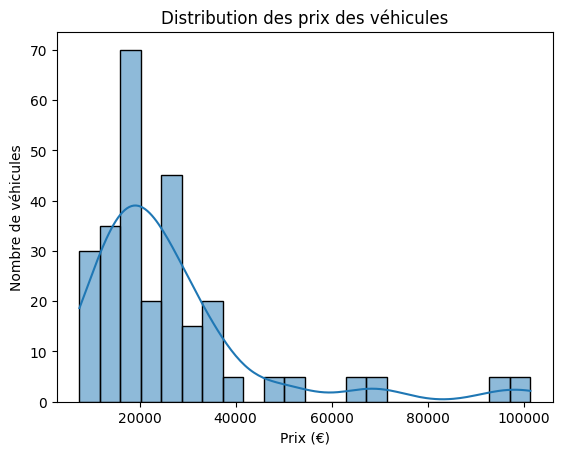

In [7]:
sns.histplot(catalogue['prix'], kde=True)
plt.title('Distribution des prix des véhicules')
plt.xlabel('Prix (€)')
plt.ylabel('Nombre de véhicules')
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

catalogue = catalogue[catalogue['occasion'] == False].copy()

# Transformation de la longueur
length_mapping = {'très longue':4, 'longue':3, 'moyenne':2, 'courte':1}
catalogue['longueur_num'] = catalogue['longueur'].map(length_mapping)

# Sélection des features
features = ['puissance', 'longueur_num', 'nbPlaces', 'prix']
X = catalogue[features]

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
catalogue['cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


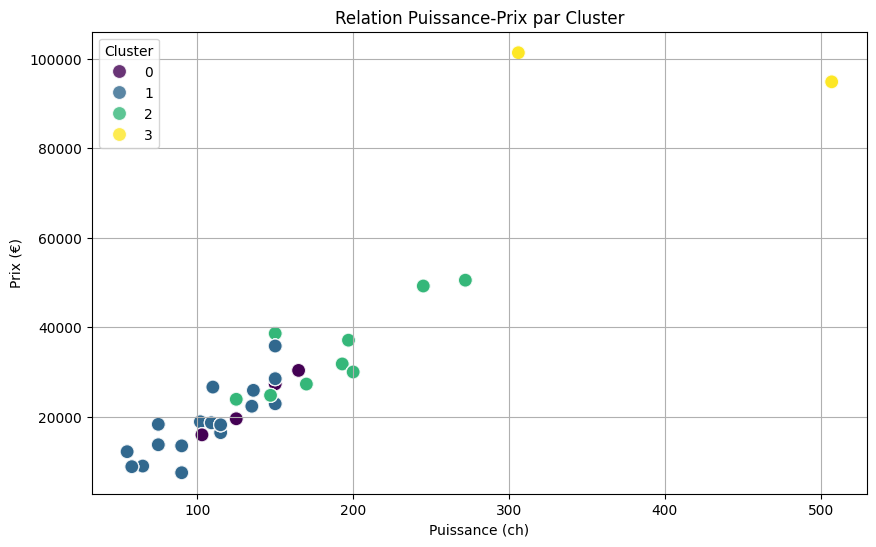

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(catalogue,x='puissance', y='prix', hue='cluster',palette='viridis', s=100, alpha=0.8)
plt.title('Relation Puissance-Prix par Cluster')
plt.xlabel('Puissance (ch)')
plt.ylabel('Prix (€)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [97]:
cluster_profiles = catalogue.groupby('cluster').agg({
    'puissance': 'mean',
    'longueur_num': 'mean',
    'nbPlaces': 'mean', 
    'prix': 'mean'
}).round()
print(cluster_profiles)

         puissance  longueur_num  nbPlaces     prix
cluster                                            
0            136.0           3.0       7.0  23300.0
1            105.0           2.0       5.0  18668.0
2            189.0           3.0       5.0  34797.0
3            406.0           4.0       5.0  98050.0


In [99]:
# Afficher 3 modèles typiques par cluster
for cl in catalogue['cluster'].unique():
    print(f"\nCluster {cl} exemples:")
    print(catalogue[catalogue['cluster']==cl][['marque','nom']].sample(3).values)


Cluster 2 exemples:
[['Nissan' 'Maxima 3.0 V6']
 ['Nissan' 'Maxima 3.0 V6']
 ['Jaguar' 'X-Type 2.5 V6']]

Cluster 0 exemples:
[['Hyundaï' 'Matrix 1.6']
 ['Honda' 'FR-V 1.7']
 ['Renault' 'Espace 2.0T']]

Cluster 1 exemples:
[['Kia' 'Picanto 1.1']
 ['Volkswagen' 'Golf 2.0 FSI']
 ['Audi' 'A2 1.4']]

Cluster 3 exemples:
[['BMW' 'M5']
 ['BMW' 'M5']
 ['Mercedes' 'S500']]


In [13]:
# Afficher 3 modèles typiques par cluster
for cl in catalogue['cluster'].unique():
    print(f"\nCluster {cl} exemples:")
    print(catalogue[catalogue['cluster']==cl][['marque','nom']].sample(3).values)


Cluster 2 exemples:
[['Fiat' 'Croma 2.2']
 ['Renault' 'Vel Satis 3.5 V6']
 ['Fiat' 'Croma 2.2']]

Cluster 0 exemples:
[['Volkswagen' 'Touran 2.0 FSI']
 ['Volkswagen' 'Touran 2.0 FSI']
 ['Renault' 'Espace 2.0T']]

Cluster 1 exemples:
[['Seat' 'Toledo 1.6']
 ['Volkswagen' 'Polo 1.2 6V']
 ['Volkswagen' 'Polo 1.2 6V']]

Cluster 3 exemples:
[['BMW' 'M5']
 ['BMW' 'M5']
 ['BMW' 'M5']]


C:\Users\hp\AppData\Local\Temp\ipykernel_11876\3264836390.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nb.index, y=nb.values, palette='Blues')


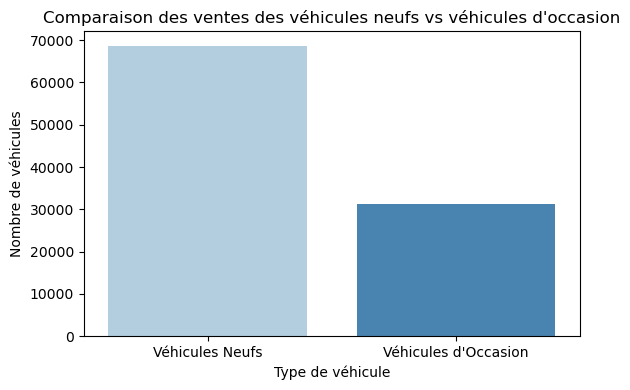

In [11]:
nb= immatriculations['occasion'].value_counts()

# Création de la visualisation
plt.figure(figsize=(6, 4))
sns.barplot(x=nb.index, y=nb.values, palette='Blues')

# Étiquetage
plt.title('Comparaison des ventes des véhicules neufs vs véhicules d\'occasion')
plt.xlabel('Type de véhicule')
plt.ylabel('Nombre de véhicules')
plt.xticks([0, 1], ['Véhicules Neufs', 'Véhicules d\'Occasion'], rotation=0)
plt.tight_layout()

# Affichage du graphique
plt.show()

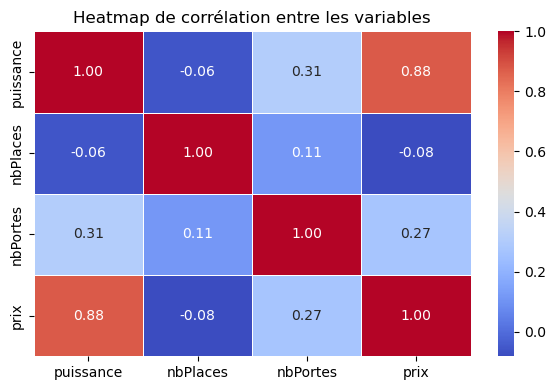

In [23]:
#Sélection des valeurs numérique pour le calcul de corrélation
df_numerique = catalogue.select_dtypes(include=["int64", "float64"])

# Affichage de la heatmap 
plt.figure(figsize=(6, 4))
sns.heatmap(df_numerique.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de corrélation entre les variables")
plt.tight_layout()
plt.show()